In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace = True)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

# EDA- Univariate Analysis

In [10]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\yashw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


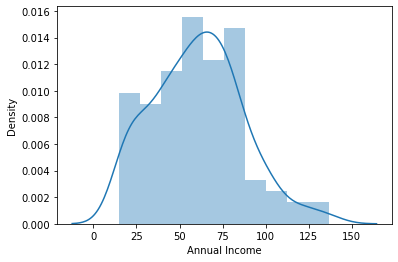

In [11]:
sns.distplot(df['Annual Income']);

C:\Users\yashw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yashw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


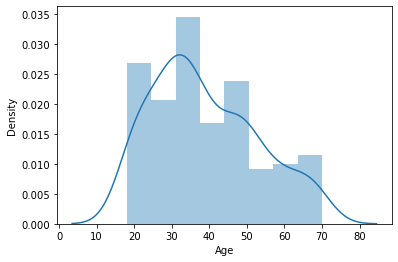

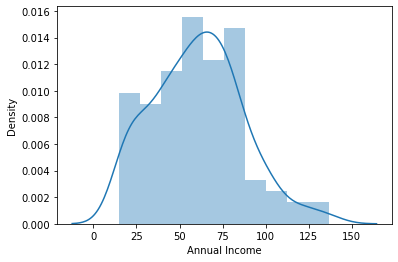

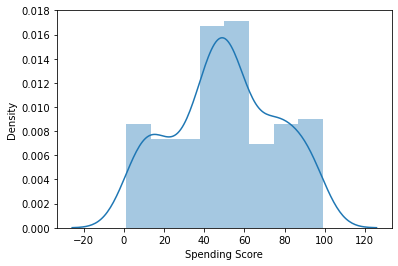

In [15]:
columns = ['Age', 'Annual Income', 'Spending Score']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    

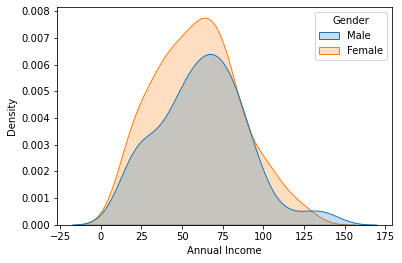

In [17]:
sns.kdeplot(df['Annual Income'], shade = True,hue=df['Gender']);

KDE-Kernel distribution plot based on the gender

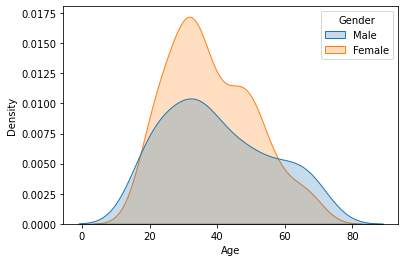

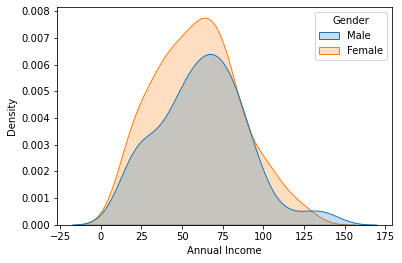

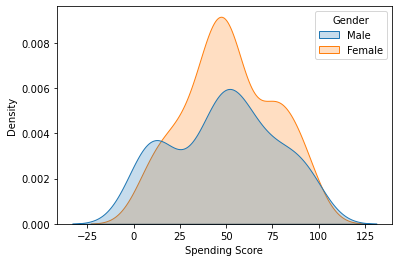

In [19]:
columns = ['Age', 'Annual Income', 'Spending Score']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade = True,hue=df['Gender'])

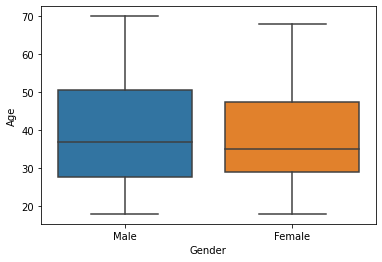

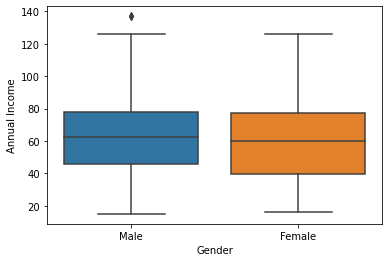

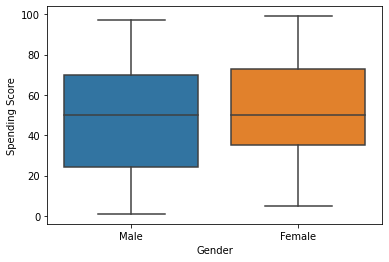

In [20]:
columns = ['Age', 'Annual Income', 'Spending Score']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade = True,hue=df['Gender'])']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender', y=df[i])

In [24]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income', ylabel='Spending Score'>

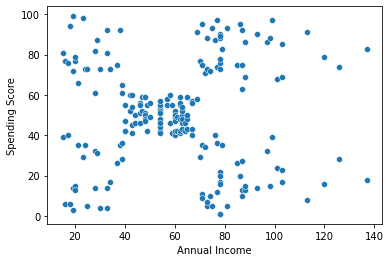

In [25]:
sns.scatterplot(data=df, x='Annual Income',y='Spending Score')

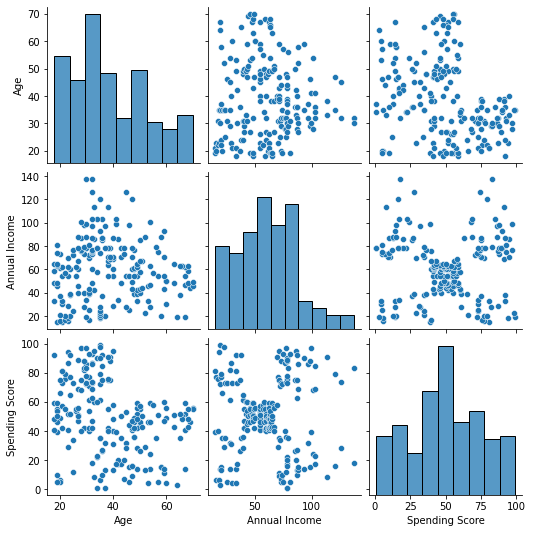

In [27]:
df=df.drop('CustomerID',axis=1)
sns.pairplot(df)

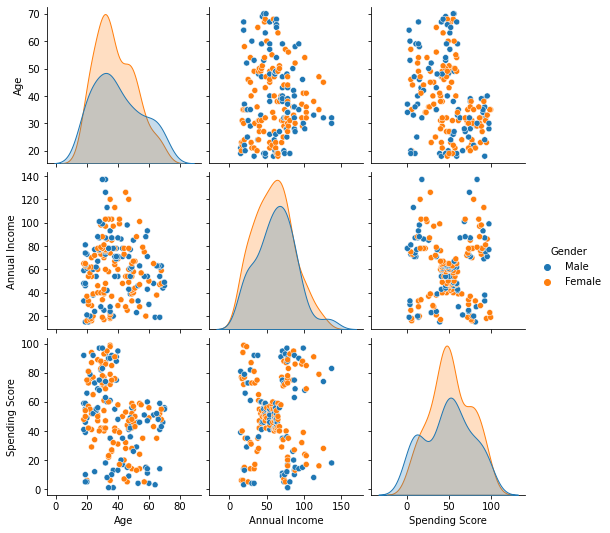

In [28]:
sns.pairplot(df, hue = 'Gender')

In [29]:
df.groupby(['Gender'])['Age', 'Annual Income', 'Spending Score'].mean()

C:\Users\yashw\AppData\Local\Temp/ipykernel_25476/1740715880.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Gender'])['Age', 'Annual Income', 'Spending Score'].mean()


,Age,Annual Income,Spending Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [30]:
df.corr()

,Age,Annual Income,Spending Score
Age,1.000000,-0.012398,-0.327227
Annual Income,-0.012398,1.000000,0.009903
Spending Score,-0.327227,0.009903,1.000000


<AxesSubplot:>

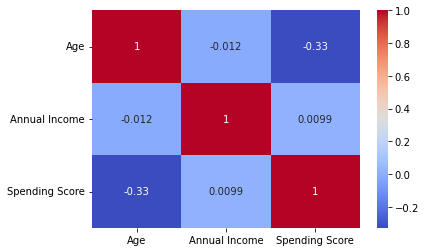

In [31]:
sns.heatmap(df.corr(), annot= True,cmap='coolwarm')

Understanding correlation between variables using a Heatmap

# Clustering - Univariate

##### To form cluster on Annual income

In [51]:
clusturing1 = KMeans(n_clusters=3)

In [52]:
clusturing1.fit(df[['Annual Income']])

KMeans(n_clusters=3)

In [53]:
clusturing1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [54]:
df['Income cluster'] = clusturing1.labels_
df.head()

,Gender,Age,Annual Income,Spending Score,Income cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [55]:
df['Income cluster'].value_counts()

2    90
1    74
0    36
Name: Income cluster, dtype: int64

In [56]:
clusturing1.inertia_

23517.33093093092

In [57]:
inertia_scores=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income']])
    inertia_scores.append(kmeans.inertia_)

C:\Users\yashw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23528.152173913048,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 3984.61577964519,
 2822.4996947496957,
 2168.478715728716,
 1746.4707792207796]

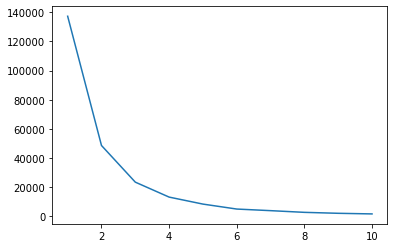

In [59]:
plt.plot(range(1,11),inertia_scores)

Elbow method- To determine the number of clusters.
Elbow starts at 3, hence 3 can be used as number of clusters

In [61]:
df.groupby('Income cluster')['Age', 'Annual Income', 'Spending Score'].mean()

C:\Users\yashw\AppData\Local\Temp/ipykernel_25476/3532987035.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Income cluster')['Age', 'Annual Income', 'Spending Score'].mean()


,Age,Annual Income,Spending Score
Income cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


In [60]:
df.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score', 'Income cluster'], dtype='object')

# Bivariate Clustering

In [66]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income', 'Spending Score']])
df['Spending and Income cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income,Spending Score,Income cluster,Spending and Income cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,0
2,Female,20,16,6,1,3
3,Female,23,16,77,1,0
4,Female,31,17,40,1,3


In [67]:
df['Spending and Income cluster'].value_counts()

1    81
4    39
2    35
3    23
0    22
Name: Spending and Income cluster, dtype: int64

In [68]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2= KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income', 'Spending Score']])
    inertia_scores2.append(kmeans2.inertia_)

C:\Users\yashw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


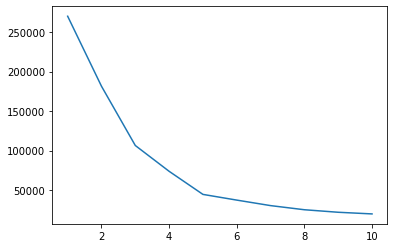

In [69]:
plt.plot(range(1,11),inertia_scores2)

Elbow starts at 5, hence 5 can be used as number of clusters

In [76]:
centres= pd.DataFrame(clustering2.cluster_centers_)
centres.columns=['x', 'y']

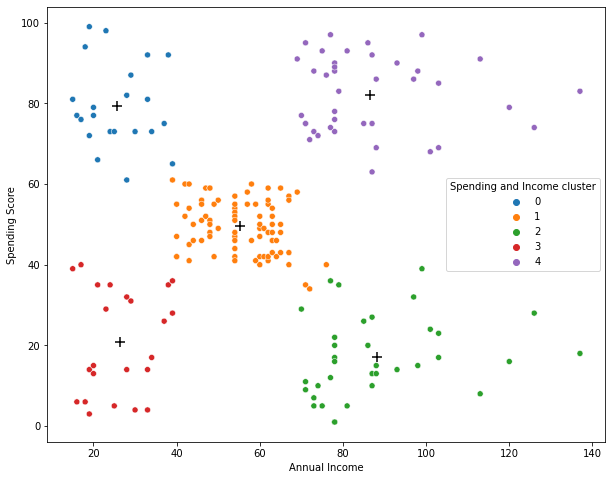

In [97]:
plt.figure(figsize=(10,8))
plt.scatter(x=centres['x'], y=centres['y'], s=100, c= 'black', marker='+')
sns.scatterplot(data=df,x ='Annual Income', y='Spending Score', hue = 'Spending and Income cluster', palette='tab10')
plt.savefig('Bivariate_clustering.png')

### Further analysis

In [80]:
pd.crosstab(df['Spending and Income cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.457143,0.542857
3,0.608696,0.391304
4,0.538462,0.461538


In [81]:
df.groupby('Spending and Income cluster')['Age', 'Annual Income', 'Spending Score'].mean()

C:\Users\yashw\AppData\Local\Temp/ipykernel_25476/1169809962.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Spending and Income cluster')['Age', 'Annual Income', 'Spending Score'].mean()


,Age,Annual Income,Spending Score
Spending and Income cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,32.692308,86.538462,82.128205


##### From this we can understand that Cluster 4 is our ideal cluster (Target Audience), with high income, average age and high spending score

# Multivariate Clustering

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
df.head()

,Gender,Age,Annual Income,Spending Score,Income cluster,Spending and Income cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,0
2,Female,20,16,6,1,3
3,Female,23,16,77,1,0
4,Female,31,17,40,1,3


In [85]:
scale = StandardScaler()

In [86]:
df.head()

,Gender,Age,Annual Income,Spending Score,Income cluster,Spending and Income cluster
0,Male,19,15,39,1,3
1,Male,21,15,81,1,0
2,Female,20,16,6,1,3
3,Female,23,16,77,1,0
4,Female,31,17,40,1,3


In [88]:
dff= pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income,Spending Score,Income cluster,Spending and Income cluster,Gender_Male
0,19,15,39,1,3,1
1,21,15,81,1,0,1
2,20,16,6,1,3,0
3,23,16,77,1,0,0
4,31,17,40,1,3,0


In [89]:
dff.columns

Index(['Age', 'Annual Income', 'Spending Score', 'Income cluster',
       'Spending and Income cluster', 'Gender_Male'],
      dtype='object')

In [90]:
dff = dff[['Age', 'Annual Income', 'Spending Score', 'Gender_Male']]
dff.head()

,Age,Annual Income,Spending Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [91]:
dff = scale.fit_transform(dff)

In [92]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


C:\Users\yashw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


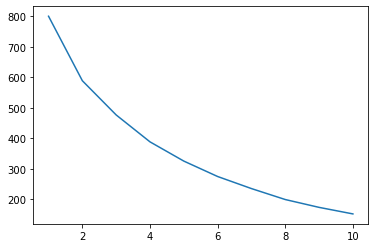

In [94]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3= KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)

In [95]:
df.to_csv('clustering.csv')